<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/kep.png" height=75 width=75>
*This notebook uses routines from [PyKE](http://github.com/keplerGO/PyKE/) which is documented [here](http://pyke.keplerscience.org/). You can find these notebooks on [GitHub](https://github.com/christinahedges/k2torials)*

<!--NAVIGATION-->
< [What are Target Pixel Files?](01.02-Investigating-Target-Pixel-Files.ipynb) | [Contents](index.ipynb) | [Folding a Light Curve](01.04-Folding-A-Lightcurve.ipynb) >

# What are Light Curve Files?

In the previous notebook we looked at Target Pixel Files, which show how each individual pixel from the spacecraft behaved. Now we are going to look at a light curve file. There are two ways to access these. You can either generate them yourself from a TPF or you can download them from MAST. The ones on MAST have been built from TPFs by summing up the pixels in the aperture and correcting for spacecraft systematics and cosmic rays. They are also smaller in file size than the TPFs.

(Some more details of how TPFs are turned into light curve files can be found in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf).)

Firstly, let's see how to build one from the target pixel file. Let's use the aperture from the pipeline by setting 'kepler-pipeline' as the aperture_mask.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(0.97, 1.02)

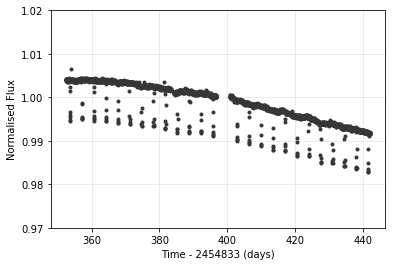

In [12]:
from pyke import targetpixelfile as tpf
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
#Build the TPF
h = tpf.KeplerTargetPixelFile('data/kplr006922244-2010078095331_lpd-targ.fits.gz',
                              aperture_mask='kepler-pipeline')
#Convert the target pixel file into a light curve:
lc = h.to_lightcurve()
fig,ax=plt.subplots(1)
lc.plot(ax,marker='.',ls='')
ax.set_ylim(0.97,1.02)

We have set the *quality_bitmask* keyword to 'hard' in this case so that any pixels with quality flags are removed. You might want to use one of the other settings so that fewer cadences are removed. This has created a simple aperture photometry light curve from our target pixel file. We can make the same thing much more quickly, with the smaller Light Curve files available from MAST.

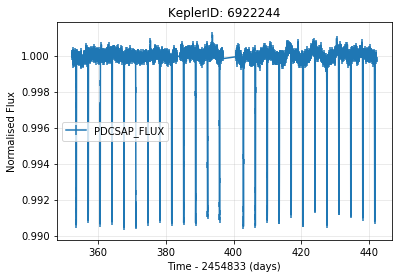

In [3]:
from pyke import lightcurve
lc = lightcurve.KeplerLightCurveFile('data/kplr006922244-2010078095331_llc.fits',quality_mask='hard')
lc.plot(['PDCSAP_FLUX'],fill=False)

(0.99, 1.01)

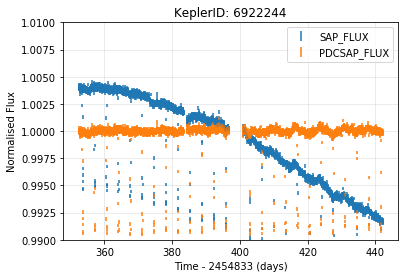

In [4]:
fig,ax=plt.subplots(1)
lc.plot(ax=ax,marker='.',ls='',ms=0.1)
ax.set_ylim(0.99,1.01)

Now that we're using the MAST light curve we have two types of 'FLUX' to choose from. *SAP_FLUX* and *PDCSAP_FLUX*. These are defined as:

* SAP FLUX: Simple Aperture Photometry Flux. 
* PDCSAP FLUX: Pre-search Data Conditioning SAP Flux. 

SAP flux is built using the aperture we saw in the previous file, by summing all of the flux in the pixels that fall within the aperture. The PDCSAP flux is built in the same aperture, and then further corrected based on the behavior of other sources on the focal plane. Trends that are common with many nearby stars are fit and removed Cotrending Basis Vectors (CBVs). (You can read more about this process in [Demystifying Kepler Data](https://arxiv.org/pdf/1207.3093.pdf).)


These two fluxes are very different, with the *PDCSAP_FLUX* having more counts and no long term trend. We will look more into the details of which 'FLUX' we should use for each application in a later notebook. For now, we will use the PDCSAP flux. This should be a more accurate representation of the true flux of this star.

<!--NAVIGATION-->
< [What are Target Pixel Files?](01.02-Investigating-Target-Pixel-Files.ipynb) | [Contents](index.ipynb) | [Folding a Light Curve](01.04-Folding-A-Lightcurve.ipynb) >